In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


# Read Data

In [141]:
train_df= pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
print (train_df.shape)
train_df.head()

(60000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# seperate label Convert to numpy and reshape

In [142]:
#1st column is lable
y=train_df['label']
print (y.shape)
y.head()

(60000,)


0    0
1    1
2    2
3    3
4    4
Name: label, dtype: int64

In [143]:
y_numpy = y.to_numpy()
y_numpy.shape
y_numpy

array([0, 1, 2, ..., 7, 8, 9])

In [144]:
# pixel value is from second column
#use iloc for all rows and from second column
x=train_df.iloc[:,1:]
print (x.shape)
x.head()

(60000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
x_numpy = x.to_numpy()
x_numpy.shape

(60000, 784)

# Reshape to image x * y

In [146]:
x_reshaped = x_numpy.reshape(x.shape[0],28,28)
x_reshaped= x_reshaped/255
x_reshaped.shape

(60000, 28, 28)

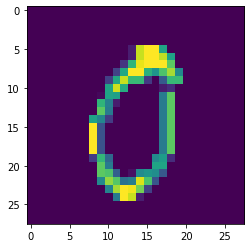

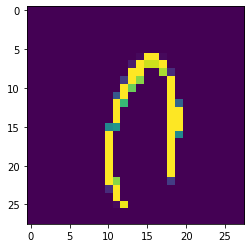

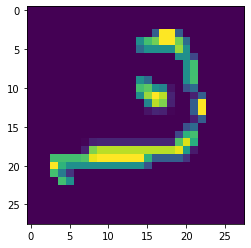

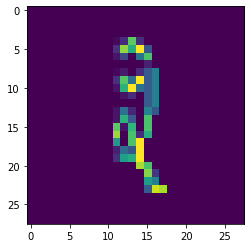

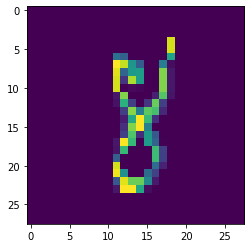

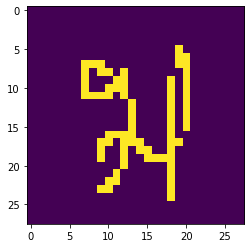

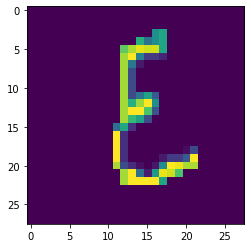

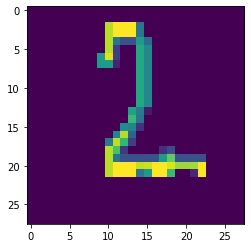

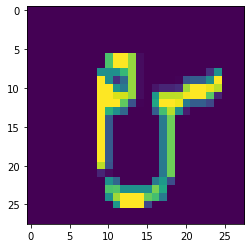

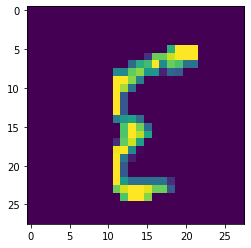

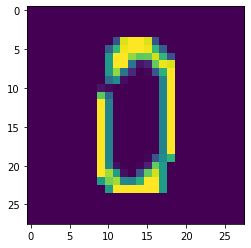

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(11):
    sample_img= x_reshaped[i]
    plt.imshow(sample_img)
    plt.show()

# Split train test

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y_numpy)
print ('x_train shape',x_train.shape)
print ('y_train shape',y_train.shape)

x_train shape (45000, 28, 28)
y_train shape (45000,)


# Create model

In [149]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [150]:
# model = Sequential()
# model.add (Conv2D (filters= 12, kernel_size=(3,3), input_shape=(28,28)))
# model.add (MaxPool2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(Dense(10))
# model.summary()

In [151]:
#model.fit(x_train,y_train)

In [1]:
import tensorflow as tf
model = Sequential()
model.add (Conv2D (filters= 32, kernel_size=(3,3), input_shape=(28,28,1)))
model.add (MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
#model.add(Dense(10, activation='softmax'))
#IF WE DO NOT USE SOFTMAX, OUTPUT IS JUST ANY NUMBER
# WE CAN CONFIRM BY LOOKING AT OUTPUT OF y_predict[1]
#IF WE USE SOFTMAX, OUTPUT IS BETWEEN 0 AND 1 AND ITS A PROBABILITY DISTRIBUTION
model.add(Dense(10))
#model.compile(optimizer='rmsprop', loss='SparseCategoricalCrossentropy')
#if i do not use from_logits, prediction was not correct as it was assuming probability distribution 
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
model.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.summary()

NameError: name 'Sequential' is not defined

In [153]:
#model.fit(x_train,y_train)
#if we do not reshape the input images we get error

# Add one more dim to input image to accomodate cnn input shape

In [154]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train.shape

(45000, 28, 28, 1)

In [155]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1269
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0571
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0419
Epoch 4/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0341
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0286
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0245
Epoch 7/10
1407/1407 [==============================] - 9s 6ms/step - loss: 0.0216
Epoch 8/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0193
Epoch 9/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0174
Epoch 10/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.0160


# Run prediction on test images from split

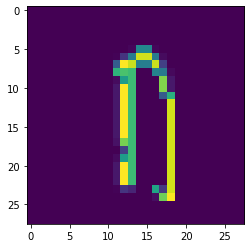

In [156]:
x_test = x_test.reshape(-1, 28, 28, 1)
img1= x_test [1]
plt.imshow(img1)


In [157]:
y_predict = model.predict(x_test)

In [158]:
y_predict[1]

array([  5.7374806,  11.910647 , -10.068515 ,   0.5535483,  -3.137322 ,
         3.1267493, -18.099373 ,  -9.370866 , -14.757632 , -21.835043 ],
      dtype=float32)

In [159]:
np.argmax(y_predict[1])

1

prediction is 7


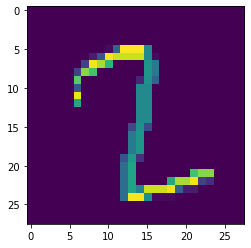

prediction is 1


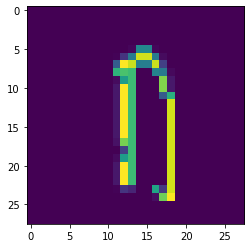

prediction is 0


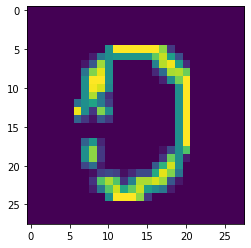

prediction is 4


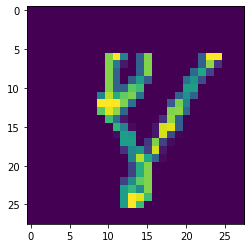

prediction is 1


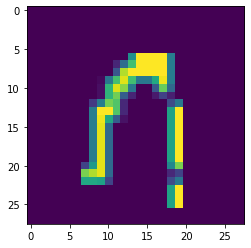

prediction is 6


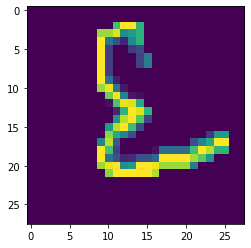

prediction is 8


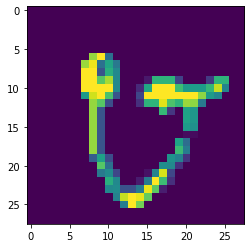

prediction is 5


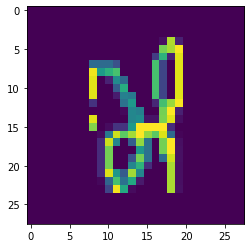

prediction is 3


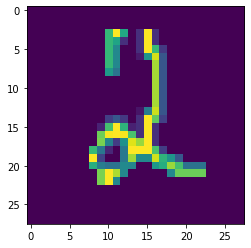

prediction is 7


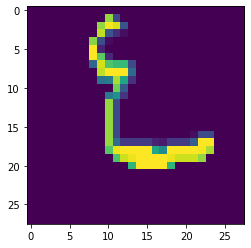

In [160]:
for i in range(10):
    curr_img= x_test[i]
    print ('prediction is',np.argmax(y_predict[i]))
    plt.imshow(curr_img)
    plt.show()

In [161]:
print (y_predict.shape)
final_pred = y_predict.argmax(axis=-1)

(15000, 10)


In [162]:
final_pred.shape


(15000,)

In [163]:
final_pred

array([7, 1, 0, ..., 3, 5, 5])

In [164]:
y_test.shape

(15000,)

In [165]:
from sklearn.metrics import classification_report

a= classification_report (y_test,final_pred)
print (a)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1519
           1       0.99      0.98      0.99      1514
           2       1.00      0.99      1.00      1473
           3       0.98      0.98      0.98      1460
           4       0.98      0.99      0.99      1478
           5       0.99      0.99      0.99      1508
           6       0.97      0.98      0.98      1548
           7       0.98      0.97      0.97      1518
           8       1.00      0.99      1.00      1498
           9       0.98      0.99      0.98      1484

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



# Run prediction on test.csv file

In [166]:
test_df= pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')
print (test_df.shape)
test_df.head()


(5000, 785)


,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
result_df = test_df[['id']]


In [168]:
test_df= test_df.iloc[:,1:]
#test_df = test_df/255.0
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
test_x_numpy = test_df.to_numpy()
test_x_reshaped = test_x_numpy.reshape(test_x_numpy.shape[0],28,28)
test_x_reshaped= test_x_reshaped/255
test_x_reshaped.shape

(5000, 28, 28)

In [170]:
test_x_reshaped_cnn = test_x_reshaped.reshape(-1, 28, 28, 1)
test_x_reshaped_cnn.shape

(5000, 28, 28, 1)

In [171]:
test_y_predict = model.predict(test_x_reshaped_cnn)

In [172]:
test_y_predict[0]

array([-11.2794485, -15.869443 ,  -6.467923 ,  19.4399   , -24.080652 ,
       -14.481053 , -13.209226 ,  -3.1958554, -39.48319  , -13.615274 ],
      dtype=float32)

In [173]:
test_y_predict[1]

array([ 11.627219 ,  -1.562902 ,  -7.2296233,  -6.8519087, -13.170459 ,
       -20.876102 , -17.026604 , -10.433495 ,  -8.825133 , -15.639238 ],
      dtype=float32)

prediction is 3


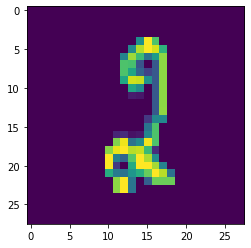

prediction is 0


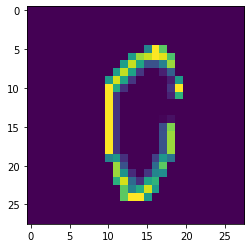

prediction is 2


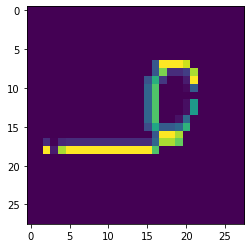

prediction is 6


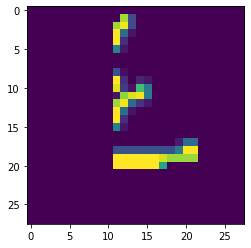

prediction is 7


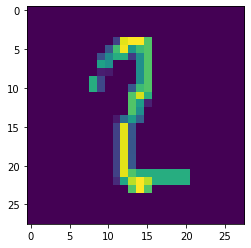

prediction is 7


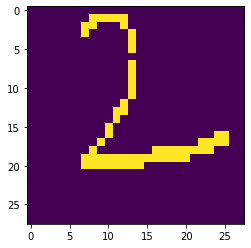

prediction is 1


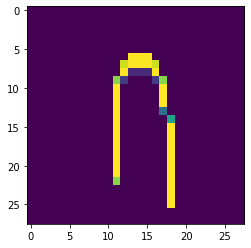

prediction is 9


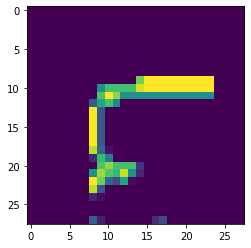

prediction is 3


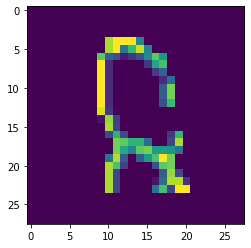

prediction is 4


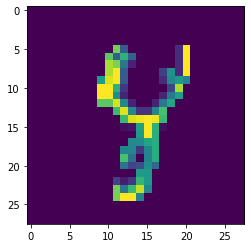

In [174]:
for i in range(10):
    curr_img= test_x_reshaped_cnn[i]
    print ('prediction is',np.argmax(test_y_predict[i]))
    plt.imshow(curr_img)
    plt.show()

# Create predicted labels

In [175]:
print (test_y_predict.shape)
test_final_pred = test_y_predict.argmax(axis=-1)
print (test_final_pred.shape)

(5000, 10)
(5000,)


In [176]:
test_final_pred

array([3, 0, 2, ..., 1, 6, 3])

In [177]:
result_df ['label'] = test_final_pred

In [178]:
result_df

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
...,...,...
4995,4995,1
4996,4996,1
4997,4997,1
4998,4998,6


In [179]:
result_df.to_csv('submission.csv',index=False)